<a href="https://colab.research.google.com/github/Becksayuk/Front-End-Nervteck-Training-Program/blob/main/Brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/BrainTumorDataset.zip

Archive:  /content/BrainTumorDataset.zip
  inflating: brain_tumor_dataset/Tumor/Y1.jpg  
  inflating: brain_tumor_dataset/Tumor/Y10.jpg  
  inflating: brain_tumor_dataset/Tumor/Y100.JPG  
  inflating: brain_tumor_dataset/Tumor/Y101.jpg  
  inflating: brain_tumor_dataset/Tumor/Y102.jpg  
  inflating: brain_tumor_dataset/Tumor/Y103.jpg  
  inflating: brain_tumor_dataset/Tumor/Y104.jpg  
  inflating: brain_tumor_dataset/Tumor/Y105.jpg  
  inflating: brain_tumor_dataset/Tumor/Y106.jpg  
  inflating: brain_tumor_dataset/Tumor/Y107.jpg  
  inflating: brain_tumor_dataset/Tumor/Y108.jpg  
  inflating: brain_tumor_dataset/Tumor/Y109.JPG  
replace brain_tumor_dataset/Tumor/Y11.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [402]:
import warnings
warnings.filterwarnings('ignore')

In [403]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import keras

In [404]:
#count the number of images in the respective classes 0-Tumor, 1-Healthy
ROOT_DIR = "/content/brain_tumor_dataset"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [405]:
number_of_images.items()

dict_items([('Tumor', 19), ('healthy', 8)])

In [406]:

# split dataset 70%-Training, 15%-Testing, 15%- Validation
#We create a train folder

def dataFolder(p, split):

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs(os.path.join("./"+p+"/"+dir))

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(split*number_of_images[dir])-2), replace = False):


        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print( p + "folder already exists")


dataFolder("train", 0.7)


trainfolder already exists


In [407]:
dataFolder("val", 0.15)

valfolder already exists


In [408]:
dataFolder("test", 0.15)

testfolder already exists


In [300]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input

In [409]:
#Preparing our data using data generator

def preprocessingImages(path):
    """
    input : path
    output : preprocessed images
    """

    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, preprocessing_function= preprocess_input, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [410]:
path = "/content/train"
train_data = preprocessingImages(path)


Found 172 images belonging to 2 classes.


In [411]:
train_data.class_indices


{'Tumor': 0, 'healthy': 1}

In [412]:

def preprocessingImages2(path):
    """
    input : path
    output : preprocessed images
    """

    image_data = ImageDataGenerator(preprocessing_function= preprocess_input)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [413]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 33 images belonging to 2 classes.


In [444]:
test_data.class_indices

{'Tumor': 0, 'healthy': 1}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [414]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 33 images belonging to 2 classes.


# Model Training

In [307]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [415]:
base_model = MobileNet(input_shape=(224,224,3), include_top=False)

In [416]:
for layer in base_model.layers:
  layer.trainable = False

In [417]:
X = Flatten()(base_model.output)
x = Dense(units=1, activation='sigmoid')(X)

model = Model(base_model.input, x)


In [311]:
model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,279,041 (12.51 MB)

 Trainable params: 50,177 (196.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [436]:
model.compile(optimizer= 'rmsprop', loss= keras.losses.binary_crossentropy, metrics=['accuracy'])


In [437]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath= "best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True)
es = EarlyStopping(monitor= 'val_accuracy', min_delta=0.01, patience=3, verbose=1)

cb = [mc, es]

In [438]:
hist = model.fit(train_data, steps_per_epoch=8, epochs=30, validation_data=val_data, validation_steps=16, callbacks=cb)

Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.7975 - loss: 5.2241
Epoch 1: val_accuracy improved from -inf to 0.87879, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 836ms/step - accuracy: 0.8016 - loss: 4.9978 - val_accuracy: 0.8788 - val_loss: 0.4912
Epoch 2/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9626 - loss: 0.0750
Epoch 2: val_accuracy improved from 0.87879 to 0.96970, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - accuracy: 0.9618 - loss: 0.0846 - val_accuracy: 0.9697 - val_loss: 0.4258
Epoch 3/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.9781 - loss: 0.1166
Epoch 3: val_accuracy did not improve from 0.96970
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - accuracy: 0.9777 - loss: 0.1107 - val_accuracy: 0.9394 - val_loss: 0.3540
Epoch 4/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9900 - loss: 0.0154
Epoch 4: val_accuracy did not improve from 0.96970
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - accuracy: 0.9867 - loss: 0.0235 - val_accuracy: 0.9394 - val_loss: 0.6091
Epoch 5/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.9941 - loss: 0.0299
Epoch 5: val_accuracy did not improve from 0.96970
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.9927 - loss: 0.0298 - val_accuracy: 0.9697 - val_loss: 0.3290
Epoch 5: early stopping


In [439]:
#load bEST mODEL

model = load_model("/content/best_model.h5")

In [440]:
acc = model.evaluate(test_data)[1]
print(f"The accuracy of the model is = {acc*100} %")

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 874ms/step - accuracy: 0.8163 - loss: 1.3878
The accuracy of the model is = 81.81818127632141 %


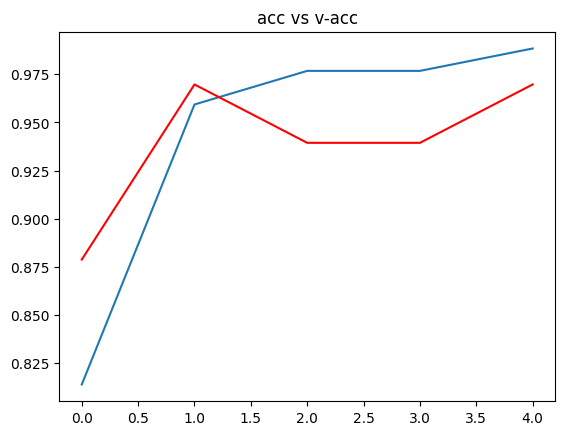

In [441]:
h = hist.history
h.keys()


plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

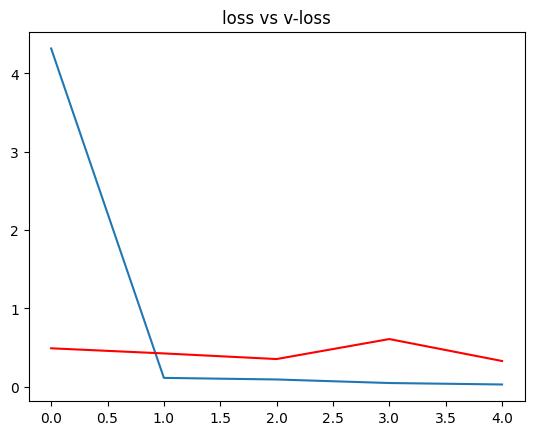

In [442]:
h = hist.history
h.keys()


plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The person has a tumor


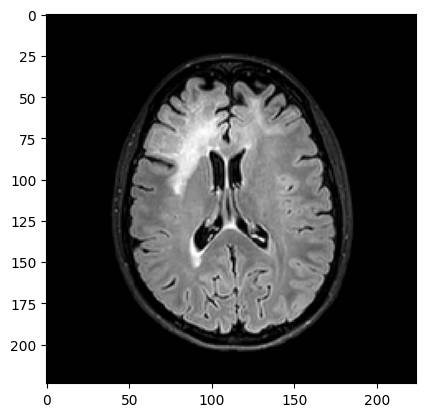

In [443]:
from keras.preprocessing import image

#path of image to see if it predicts correct class
path = "/content/test/healthy/no 10.jpg"
img = image.load_img(path, target_size=(224,224))

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("The person has a tumor")
else:
  print("The person is healthy")

#to display image
plt.imshow(input_arr[0])
plt.show()